In [1]:
import requests
import matplotlib.pyplot as plt
import pygal
from pygal.style import LightColorizedStyle as LCS, LightenStyle as LS


In [2]:
# Make an API call and store the response.
url = 'https://api.github.com/search/repositories?q=language:python&sort=stars'

requested = requests.get(url)

In [3]:
#print out our request
print("Status code:", requested.status_code) 

# Store API response in a variable.
response_dict = requested.json()
# Process results.
print(response_dict.keys())

#If the status code is 200, then we know that the request was successful.



Status code: 200
dict_keys(['total_count', 'incomplete_results', 'items'])



"""Simple calls like this should return a complete set of results, so it is pretty safe to ignore
the value associated with 'incomplete_results'. But when you are making more complex
API calls, your program should check this value. """

In [4]:
print("Total repositories:", response_dict['total_count'])

# Explore information about the repositories.
repo_dicts = response_dict['items']
print("No of Repositories returned:", len(repo_dicts))


# Let's examine the first repository.
repo_dict_1 = repo_dicts[0]
print("\nKeys:", len(repo_dict_1))
#for key in sorted(repo_dict_1.keys()):
   # print(key)
  

Total repositories: 8124975
No of Repositories returned: 30

Keys: 78


In [5]:
#Let’s get some of the values for some of the keys in repo_dict_1:   
print("\nSelected information about first repository:")
print('Name:', repo_dict_1['name'])
print('Owner:', repo_dict_1['owner']['login'])
print('Stars:', repo_dict_1['stargazers_count'])
print('Repository:', repo_dict_1['html_url'])
print('Created:', repo_dict_1['created_at'])
print('Updated:', repo_dict_1['updated_at'])
print('Description:', repo_dict_1['description'])



Selected information about first repository:
Name: system-design-primer
Owner: donnemartin
Stars: 181744
Repository: https://github.com/donnemartin/system-design-primer
Created: 2017-02-26T16:15:28Z
Updated: 2022-05-27T00:37:36Z
Description: Learn how to design large-scale systems. Prep for the system design interview.  Includes Anki flashcards.


# This doc string explains the set of printed out codes above.
"""Here we print out the values for a number of keys from the first repository's
dictionary. At line 36, we print the name of the project. An entire dictionary
represents the project's owner, so at line 37 we used the key owner to access
the dictionary representing the owner and then use the key login to get the
owner's login name. At line 39, we print out how many stars the project has earned
and the URL for the project's GitHub repository. We then show when it was
created x and when it was last updated. Finally, we print out the repository's
description."""

In [6]:
names, stars = [], []


In [7]:
for repo_dict in repo_dicts:
    names.append(repo_dict['name'])
    stars.append(repo_dict['stargazers_count'])

In [8]:
print(names)

['system-design-primer', 'awesome-python', 'Python-100-Days', 'youtube-dl', 'thefuck', 'ansible', 'big-list-of-naughty-strings', 'openpilot', 'CppCoreGuidelines', 'pandas', 'd2l-zh', 'XX-Net', 'certbot', 'HanLP', 'yt-dlp', 'Python', 'Detectron', 'YouCompleteMe', 'pytorch-tutorial', 'sqlmap', 'data-science-ipython-notebooks', 'python-fire', 'ItChat', 'MockingBird', 'ML-From-Scratch', 'algorithms', 'hosts', 'CheatSheetSeries', 'ray', 'numpy']


In [9]:
print(stars)

[181744, 128318, 119294, 110275, 71264, 53258, 42395, 34649, 34114, 34034, 32704, 31247, 28943, 25999, 25919, 25438, 25160, 23986, 23793, 23564, 23112, 22450, 22196, 21710, 21101, 20845, 20813, 20722, 20615, 20535]


# Making Visualizations

In [11]:
import pandas as pd


In [14]:
dict = {"projectNames" : names, "numberOfstars": stars}

In [15]:
df = pd.DataFrame(dict)
df.to_csv('Github_Api.csv')

my_style = LS('#333366', base_style=LCS)
chart = pygal.Bar(style=my_style, x_label_rotation=45, show_legend=False)
chart.title = 'Most-Starred Python Projects on GitHub'
chart.x_labels = names

chart.add('', stars)


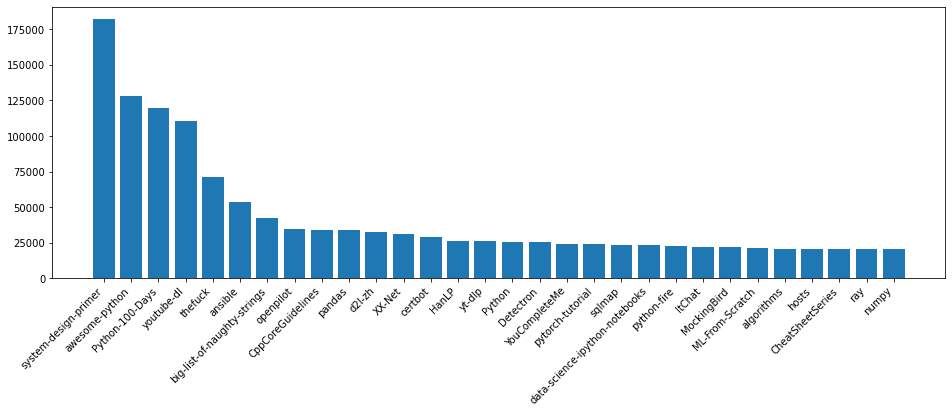

In [16]:
#my_style = LS('#333366', base_style=LCS)
plt.figure(figsize=(16,5))
p =plt.bar(names,stars)
plt.title = ('Most-Starred Python Projects on GitHub')
plt.xticks(names, rotation=45, horizontalalignment='right')
plt.savefig('api_repos.pdf', dpi=3000)
plt.show()

#chart.add('', stars)


In [ ]:
from wordcloud import WordCloud